In [ ]:
!pip install xarray netCDF4 pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.6 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import pandas as pd

# 读取上传的 NetCDF 文件
file_path = 'pp_0.1deg_day_2024_grid_ensmean.nc'  # 这个文件路径根据实际上传的文件名进行修改
ds = xr.open_dataset(file_path)

# 查看数据集的结构
print(ds)

# 假设你对 'pp' 变量（降水量）感兴趣，获取这个变量的数据
precipitation = ds['pp']

# 将数据转换为 Pandas DataFrame
df = precipitation.to_dataframe().reset_index()

# 查看前几行数据
print(df.head())

# 保存为 CSV 文件
output_csv_path = '/content/precipitation_2024.csv'
df.to_csv(output_csv_path, index=False)

print(f"CSV file saved at: {output_csv_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/pp_0.1deg_day_2024_grid_ensmean.nc'

In [ ]:
import pandas as pd

# 加载 CSV 文件，并将 'time' 列解析为日期类型
csv_file_path = 'precipitation_2024.csv'  # 文件路径
df = pd.read_csv(csv_file_path, parse_dates=['time'])

# 显示前几行数据以检查
print(df.head())

# 检查 'time' 列的类型
print(f"Time column type: {df['time'].dtype}")

# 如果 'time' 列确实是日期类型，可以进行时间序列分析。




        time   latitude  longitude  pp
0 2024-01-01  25.049861  -24.95014 NaN
1 2024-01-01  25.049861  -24.85014 NaN
2 2024-01-01  25.049861  -24.75014 NaN
3 2024-01-01  25.049861  -24.65014 NaN
4 2024-01-01  25.049861  -24.55014 NaN
Time column type: datetime64[ns]


In [ ]:
print(df.columns)
print(df.head())


Index(['time', 'latitude', 'longitude', 'pp'], dtype='object')
        time   latitude  longitude  pp
0 2024-01-01  25.049861  -24.95014 NaN
1 2024-01-01  25.049861  -24.85014 NaN
2 2024-01-01  25.049861  -24.75014 NaN
3 2024-01-01  25.049861  -24.65014 NaN
4 2024-01-01  25.049861  -24.55014 NaN


<ipython-input-3-0e4bf88d2db1>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precipitation = df.resample('M')['pp'].sum()


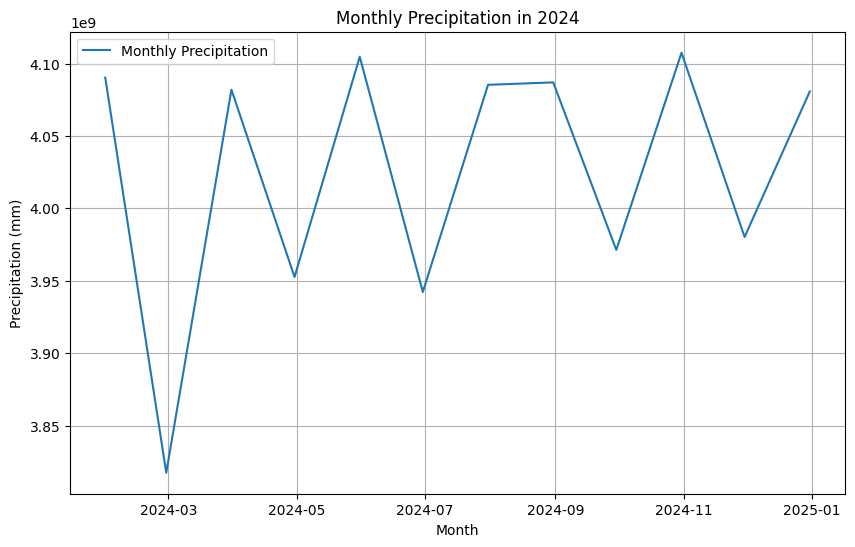

Extreme precipitation events: 47777473


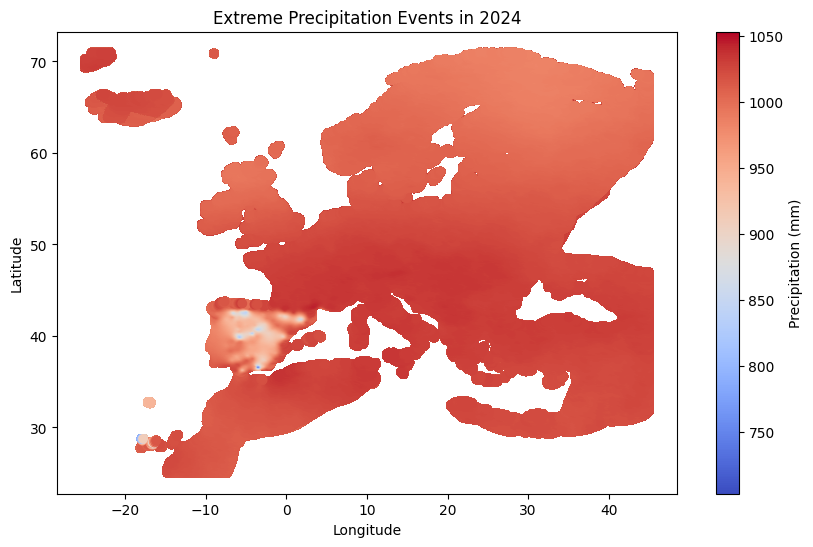

In [ ]:
import matplotlib.pyplot as plt
# 3. 时间序列分析：转换时间列
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# 4. 计算日降水量的月度总和
monthly_precipitation = df.resample('M')['pp'].sum()

# 5. 绘制时间序列图：展示2024年降水的趋势
plt.figure(figsize=(10, 6))
plt.plot(monthly_precipitation, label='Monthly Precipitation')
plt.title('Monthly Precipitation in 2024')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

# 6. 极端降水事件：设定一个降水阈值，统计超过该值的事件
extreme_precipitation = df[df['pp'] > 50]  # 假设极端降水事件阈值为50mm
print(f"Extreme precipitation events: {len(extreme_precipitation)}")

# 7. 极端降水事件的时空分布：展示哪些地点发生了极端降水事件
plt.figure(figsize=(10, 6))
plt.scatter(extreme_precipitation['longitude'], extreme_precipitation['latitude'], c=extreme_precipitation['pp'], cmap='coolwarm')
plt.title('Extreme Precipitation Events in 2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Precipitation (mm)')
plt.show()

In [ ]:
import xarray as xr
import pandas as pd
# 读取上传的 NetCDF 文件
file_path = 'rr_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc'  # 这个文件路径根据实际上传的文件名进行修改
ds = xr.open_dataset(file_path)

# 查看数据集的结构
print(ds)

# 假设你对 'pp' 变量（降水量）感兴趣，获取这个变量的数据
precipitation = ds['rr']

# 将数据转换为 Pandas DataFrame
df = precipitation.to_dataframe().reset_index()

# 查看前几行数据
print(df.head())

# 保存为 CSV 文件
output_csv_path = '/content/precipitation_2011-2024.csv'
df.to_csv(output_csv_path, index=False)

print(f"CSV file saved at: {output_csv_path}")

<xarray.Dataset> Size: 2GB
Dimensions:    (latitude: 201, longitude: 464, time: 4930)
Coordinates:
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * time       (time) datetime64[ns] 39kB 2011-01-01 2011-01-02 ... 2024-06-30
Data variables:
    rr         (time, latitude, longitude) float32 2GB ...
Attributes:
    E-OBS_version:  30.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Aug 30 12:51:46 2024: ncks --no-abc -d time,22280,272...
    NCO:            netCDF Operators version 5.1.8 (Homepage = http://nco.sf....
